# python实现
> PyEMD [PyEMD’s documentation](https://pyemd.readthedocs.io/en/latest/)  
> EMD-signal [github](https://pypi.org/project/EMD-signal/)  
- Given the nature of EEMD, each time you decompose a signal you will obtain a different set of components. That’s the expected consequence of adding noise which is going to be random. To make the decomposition reproducible, one needs to set a seed for the random number generator used in EEMD. This is done using PyEMD.EEMD.noise_seed() method on the instance.

In [2]:
import numpy as np
from PyEMD import EEMD

<Figure size 3000x1800 with 0 Axes>

<AxesSubplot:>

Text(0.5, 1.0, 'Original Signal')

<AxesSubplot:>

Text(0.5, 1.0, 'IMF 1')

<AxesSubplot:>

Text(0.5, 1.0, 'IMF 2')

<AxesSubplot:>

Text(0.5, 1.0, 'IMF 3')

<AxesSubplot:>

Text(0.5, 1.0, 'IMF 4')

<AxesSubplot:>

Text(0.5, 1.0, 'IMF 5')

<AxesSubplot:>

Text(0.5, 1.0, 'Residue')

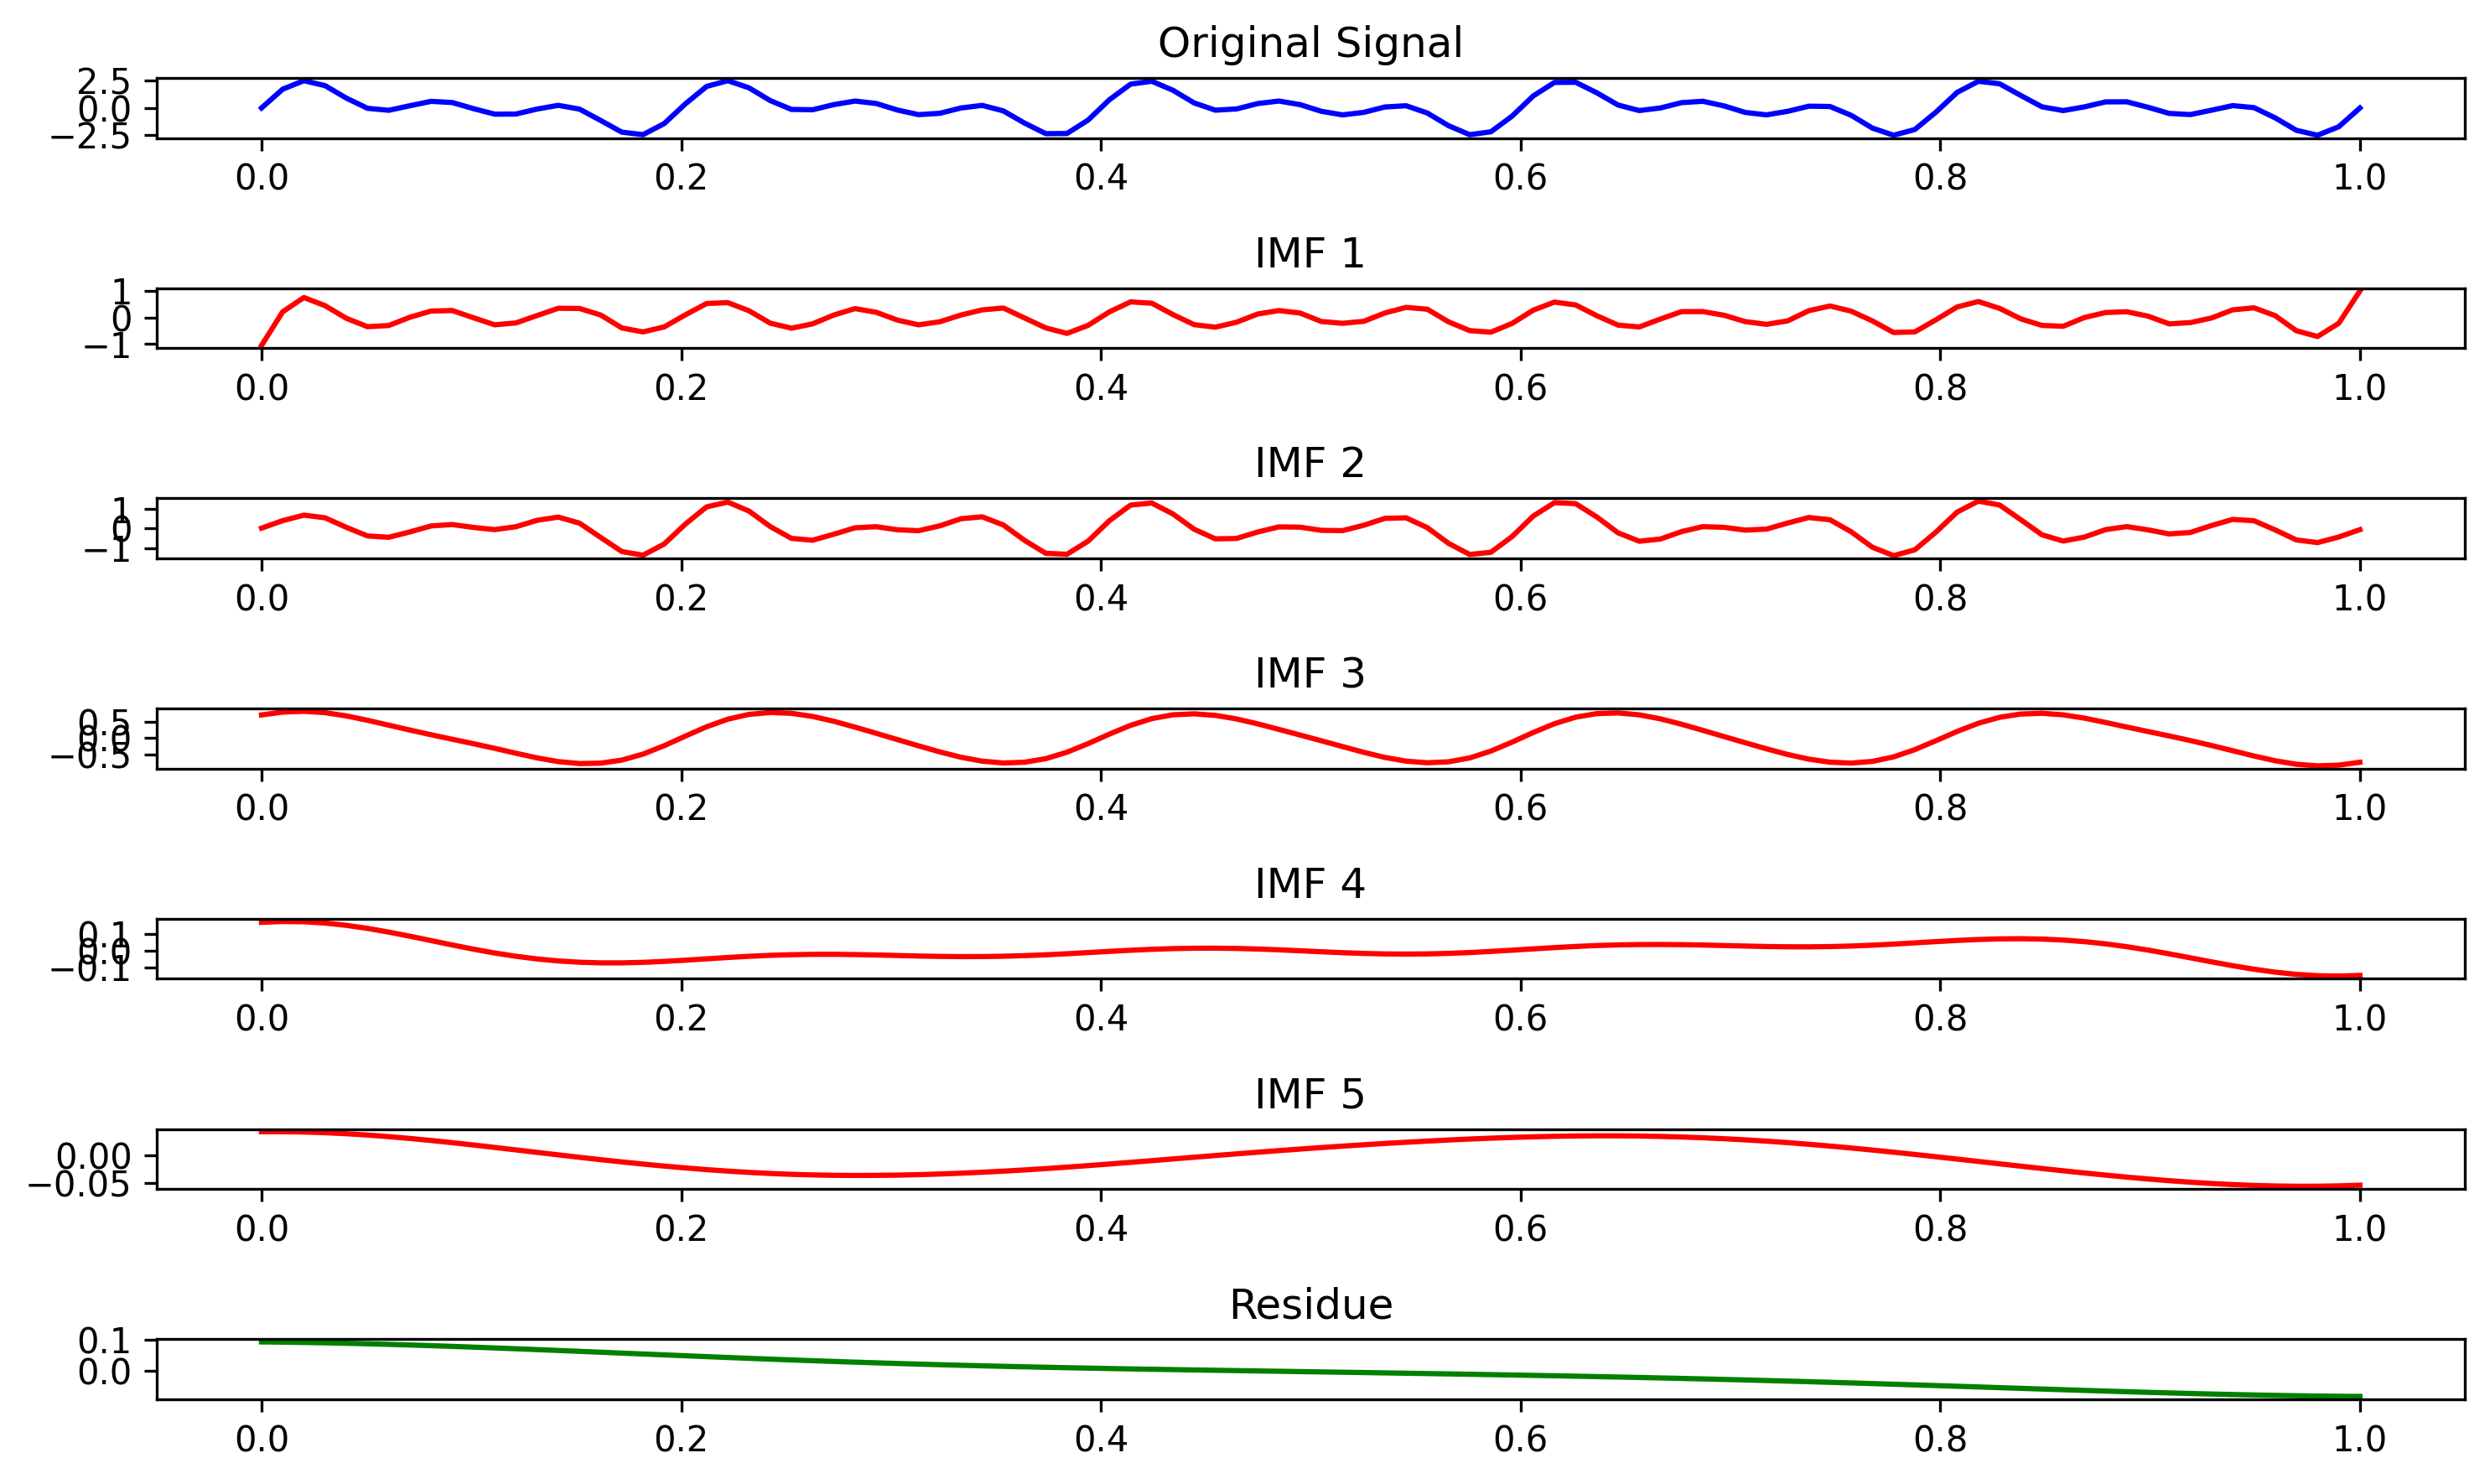

In [4]:
# 创建一个示例信号
t = np.linspace(0, 1, 100)  # 时间范围
signal = np.sin(2*np.pi*5*t) + np.sin(2*np.pi*10*t) + np.sin(2*np.pi*15*t)

# 创建EEMD对象
eemd = EEMD(trials=1000, noise_width=0.2, separate_trends=True)
eemd.noise_seed(0)

# 进行EEMD分解
eemd_data = eemd.eemd(signal)

# 提取IMF分量和剩余项
imfs, res = eemd_data[:-1], eemd_data[-1]

# 绘制原始信号和各个IMF分量
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6), dpi=300)

# 原始信号
plt.subplot(len(imfs) + 2, 1, 1)
plt.plot(t, signal, 'b')
plt.title('Original Signal')

# 绘制IMF分量
for i, imf in enumerate(imfs):
    plt.subplot(len(imfs) + 2, 1, i + 2)
    plt.plot(t, imf, 'r')
    plt.title(f'IMF {i+1}')

# 绘制剩余项
plt.subplot(len(imfs) + 2, 1, len(imfs) + 2)
plt.plot(t, res, 'g')
plt.title('Residue')

plt.tight_layout()
plt.show()